In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Exploration

In [2]:
df=pd.read_csv(r"C:\Users\kibe\Downloads\master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# checking for missing values

In [18]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

# Exploratory Analysis

In [17]:
grouped = df.groupby('age')['suicides_no'].sum()
print(grouped)

age
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
5-14 years       52264
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64


More suicide cases are of victims between the age of 35-54 yrs

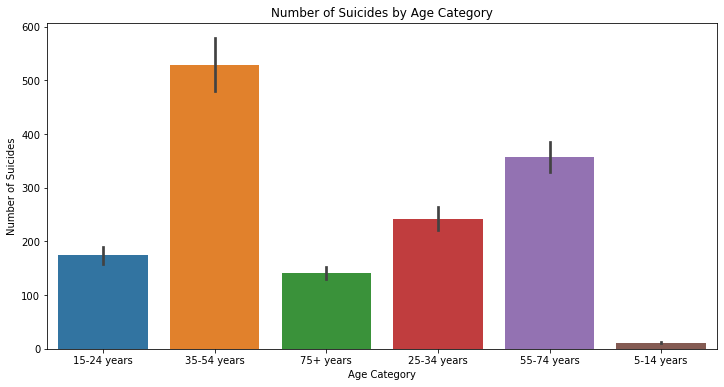

In [27]:
plt.figure(figsize=(12,6)) 
sns.barplot(x='age', y='suicides_no', data=df)
plt.xlabel('Age Category')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides by Age Category')
plt.show()

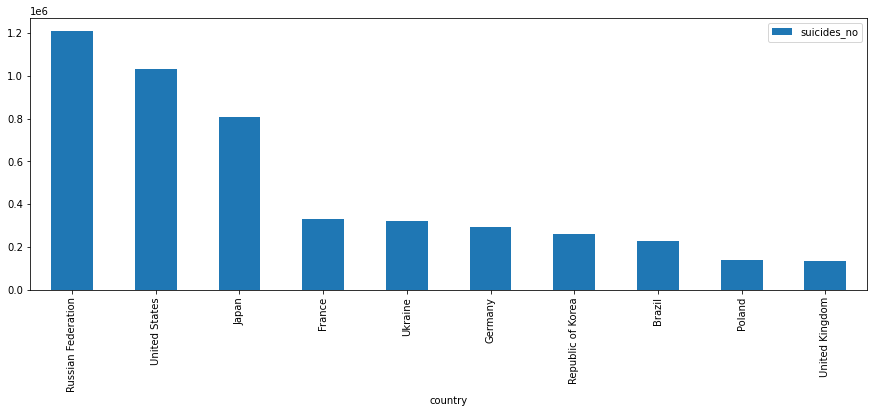

In [30]:
df.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=False).head(10).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

plt.show()

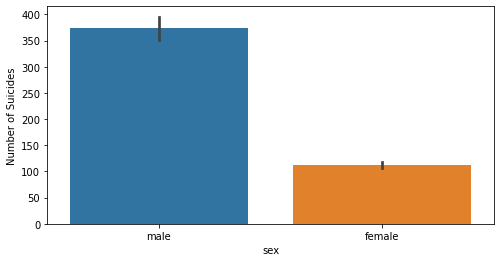

In [35]:
plt.figure(figsize=(8,4)) 
ax=sns.barplot(x='sex', y='suicides_no', data=df)
plt.xlabel('sex')
plt.ylabel('Number of Suicides')
plt.show()

More males fall victim to suicide than females

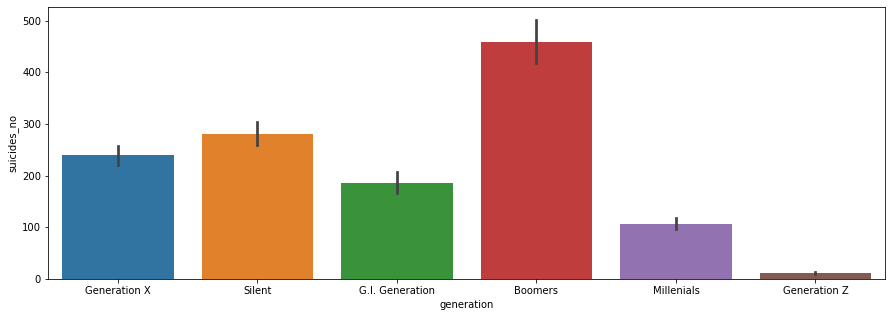

In [36]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='generation', y='suicides_no', data=df)

Suicide rates are higher among the boomer generation and lowest in the Generation Z

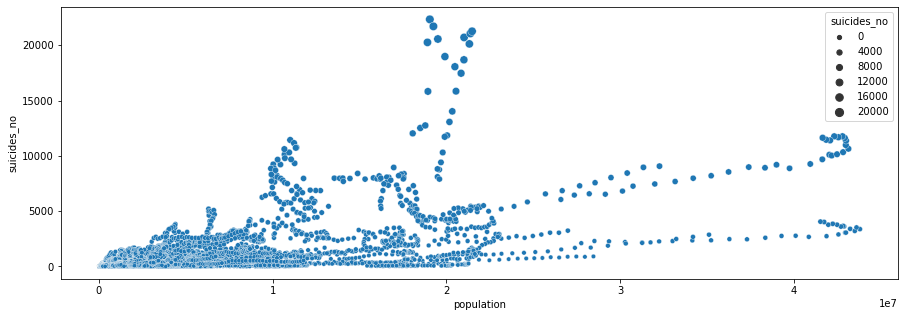

In [38]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['population'],y='suicides_no', data=df, size = "suicides_no")

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

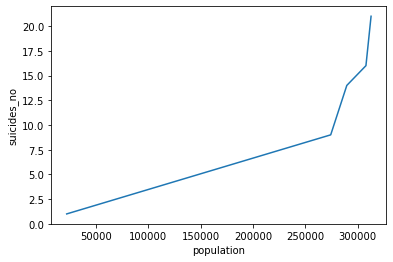

In [3]:
sns.lineplot(x='population',y='suicides_no', data=df.head())

<b>Scatter plot for Number of Suicides/100k Population Vs GDP Per Capita</b>

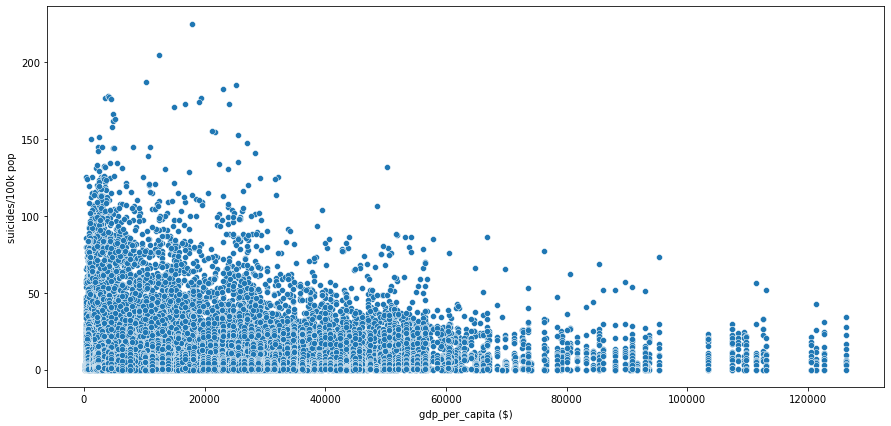

In [4]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df) # scatter plot 
plt.show()

Looks like higher suicide rates are a bit more prevalent in countries with lower GDP Per Capita.

# Corrrelation Analysis

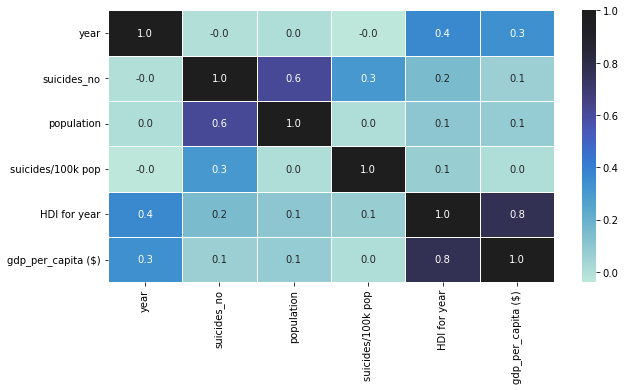

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [12]:
df.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


Human Development Index - gdp per capita is the only pair with the high correlation.

# pattern analysis using trend plot

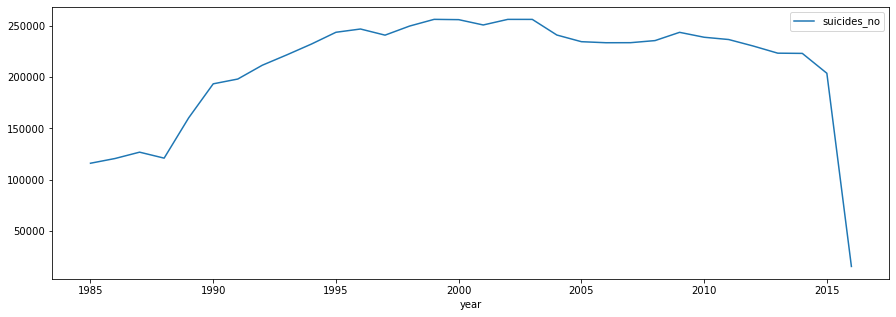

In [13]:
df[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

<b>Checking the pattern using Trend plot (1985-2015) suicides/100k pop Vs Years</b>

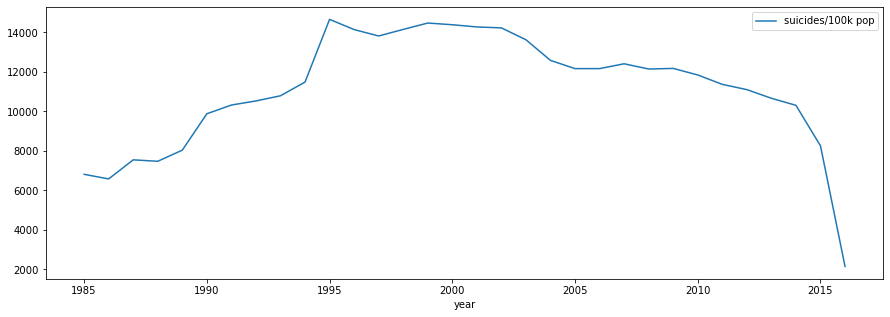

In [15]:
df[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()